In [2]:
import pandas as pd
import numpy as np
from scipy import optimize
from pylab import *
%matplotlib inline

In [3]:
# 1) Read Data into big dataframe
# 2) Filter moments out and average them in a list t vs <a>, <a^2>, etc.
# 3) Fit with power-law and goodness-of-fit-routine to get exponents in t and L with corrections
# 4) Filter out avalanche sizes and get moments for time-integrated activity (not before wednesday!)

In [4]:
# 1) Read Data into dataframe
filename = "output_N1e7_D2_L10"
rawdata = pd.read_csv("../data/" + filename + ".out", sep = "\t", comment = '#', dtype={'M4': float, 'M5': float, 'M6': float, 'M7': float, 'M8': float})


In [5]:
# 2) Filter moments out
moments = rawdata[["L", "t", "chunk", "M1", "M2", "M3", "M4", "M5", "M6", "M7", "M8"]]

In [6]:
system_sizes = moments["L"].unique()

In [41]:
moments.ix[:,"M1":"M4"]


,M1,M2,M3,M4
0,26316.0,7.669600e+04,2.470200e+05,8.746720e+05
1,32995.0,1.235590e+05,5.173570e+05,2.393731e+06
2,39389.0,1.773890e+05,8.935790e+05,4.968209e+06
3,45579.0,2.387830e+05,1.402071e+06,9.113863e+06
4,51393.0,3.043850e+05,2.020299e+06,1.483500e+07
5,57201.0,3.783690e+05,2.804469e+06,2.295908e+07
6,62893.0,4.596890e+05,3.773959e+06,3.433234e+07
7,68317.0,5.445610e+05,4.882603e+06,4.860532e+07
8,73610.0,6.354460e+05,6.177200e+06,6.663891e+07
9,78908.0,7.346960e+05,7.727528e+06,9.051759e+07


In [7]:
moments_grouped = moments.groupby(["L", "t"]).mean()

In [25]:
pd.std(moments.groupby(["L", "t"]).mean()["M1"])

pandas.core.series.Series

In [383]:
moments_grouped[moments_grouped.index.get_level_values('L') == 15].reset_index()

,L,t,chunk,M1,M2,M3,M4,M5,M6,M7,M8
0,15,1,500.5,26421.697,7.747115e+04,2.513777e+05,8.981988e+05,3.509764e+06,1.488790e+07,6.809236e+07,3.338553e+08
1,15,2,500.5,33050.504,1.240569e+05,5.205282e+05,2.411489e+06,1.221528e+07,6.713980e+07,3.980717e+08,2.534917e+09
2,15,3,500.5,39385.163,1.775381e+05,8.956728e+05,4.987091e+06,3.035525e+07,2.005857e+08,1.431677e+09,1.099869e+10
3,15,4,500.5,45468.551,2.376124e+05,1.390163e+06,8.977700e+06,6.343945e+07,4.876144e+08,4.060002e+09,3.651433e+10
4,15,5,500.5,51342.389,3.040993e+05,2.018064e+06,1.479809e+07,1.189745e+08,1.043750e+09,9.959785e+09,1.031218e+11
5,15,6,500.5,57038.946,3.768371e+05,2.793200e+06,2.291539e+07,2.066613e+08,2.040868e+09,2.201319e+10,2.587337e+11
6,15,7,500.5,62580.385,4.556770e+05,3.729418e+06,3.385321e+07,3.387637e+08,3.725138e+09,4.491078e+10,5.921214e+11
7,15,8,500.5,67988.644,5.405567e+05,4.841861e+06,4.822112e+07,5.310981e+08,6.451726e+09,8.626871e+10,1.266413e+12
8,15,9,500.5,73267.848,6.312005e+05,6.142467e+06,6.664834e+07,8.024865e+08,1.069867e+10,1.576026e+11,2.557074e+12
9,15,10,500.5,78435.631,7.275753e+05,7.645515e+06,8.983498e+07,1.175121e+09,1.707494e+10,2.748463e+11,4.878904e+12


# Fitting time-dependency

## Power-Law fit

In [430]:
# Write out moments vs t for each system size
moments_system = []
for L in system_sizes:
    moments_system.append(moments_grouped[moments_grouped.index.get_level_values('L') == L].reset_index())

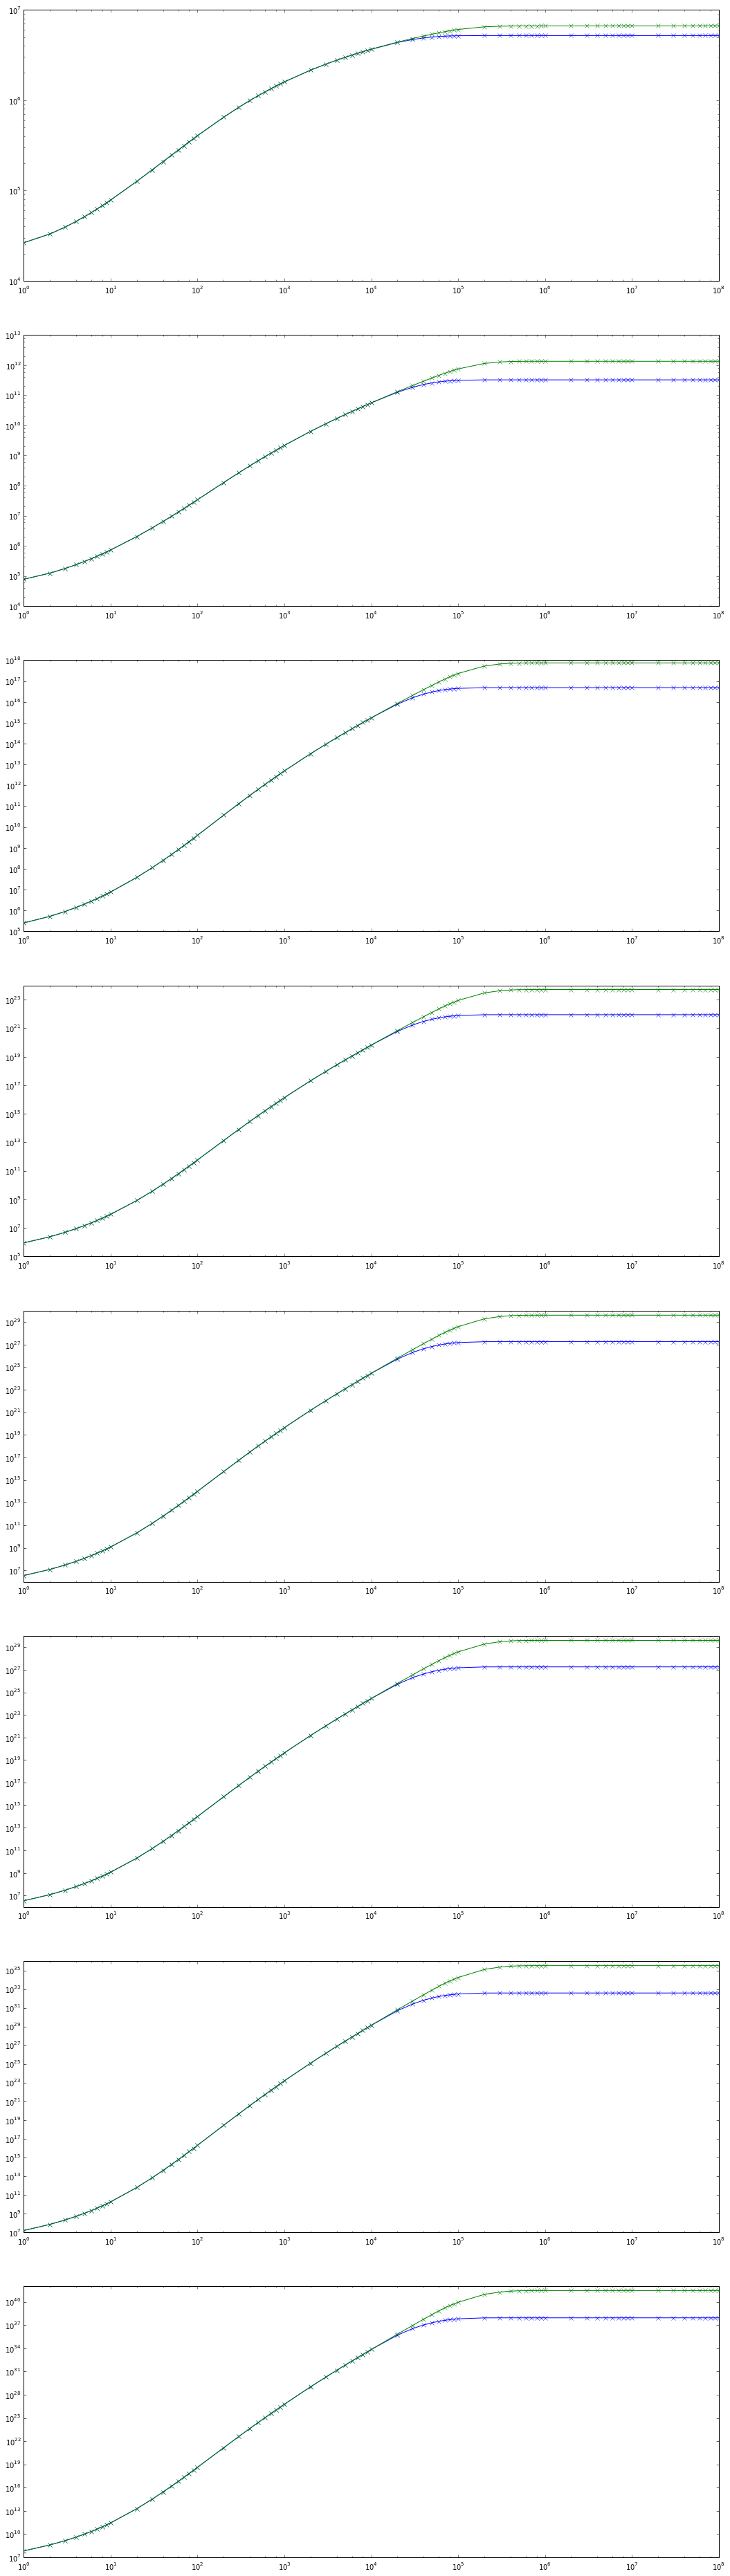

In [386]:
# Plot first 8 moments for largest two system sizes to determine where to fit for powerlaw

fig = plt.figure(figsize = (18,66))
ax1 = fig.add_subplot(811)

ax1.loglog(moments_system[5]["t"].values, moments_system[5]["M1"].values, 'x-')
ax1.loglog(moments_system[6]["t"].values, moments_system[6]["M1"].values, 'x-')

ax2 = fig.add_subplot(812)
ax2.loglog(moments_system[5]["t"].values, moments_system[5]["M2"].values, 'x-')
ax2.loglog(moments_system[6]["t"].values, moments_system[6]["M2"].values, 'x-')

ax3 = fig.add_subplot(813)
ax3.loglog(moments_system[5]["t"].values, moments_system[5]["M3"].values, 'x-')
ax3.loglog(moments_system[6]["t"].values, moments_system[6]["M3"].values, 'x-')

ax4 = fig.add_subplot(814)
ax4.loglog(moments_system[5]["t"].values, moments_system[5]["M4"].values, 'x-')
ax4.loglog(moments_system[6]["t"].values, moments_system[6]["M4"].values, 'x-')

ax5 = fig.add_subplot(815)
ax5.loglog(moments_system[5]["t"].values, moments_system[5]["M5"].values, 'x-')
ax5.loglog(moments_system[6]["t"].values, moments_system[6]["M5"].values, 'x-')

ax6 = fig.add_subplot(816)
ax6.loglog(moments_system[5]["t"].values, moments_system[5]["M5"].values, 'x-')
ax6.loglog(moments_system[6]["t"].values, moments_system[6]["M5"].values, 'x-')

ax7 = fig.add_subplot(817)
ax7.loglog(moments_system[5]["t"].values, moments_system[5]["M6"].values, 'x-')
ax7.loglog(moments_system[6]["t"].values, moments_system[6]["M6"].values, 'x-')

ax8 = fig.add_subplot(818)
ax8.loglog(moments_system[5]["t"].values, moments_system[5]["M7"].values, 'x-')
ax8.loglog(moments_system[6]["t"].values, moments_system[6]["M7"].values, 'x-')

plt.show()

In [442]:
# Now read off time boundaries for different moments and write them into corresponding tuples

fit_region = {}
fit_region["M1"] = [3000, 10000]
fit_region["M2"] = [2000, 20000]
fit_region["M3"] = [2000, 20000]
fit_region["M4"] = [2000, 20000]
fit_region["M5"] = [2000, 20000]
fit_region["M6"] = [2000, 20000]
fit_region["M7"] = [2000, 20000]
fit_region["M8"] = [2000, 20000]

In [448]:
# Compute standard deviation
# sigma = [ <x^2> - <x>^2 ]^(1/2)
# std_dev = sigma/N = sigma/<x^0>
# Only doable for first 4 moments ?

N= float(1e7)
entire_time_series = {}
entire_moment_series = {}

for m in range(1,9):
    entire_data_series = [ [mom[0], mom[1]] for mom in moments_system[6][["t", "M"+str(m)]].values]
    entire_time_series["M"+str(m)] = [item[0] for item in entire_data_series]
    entire_moment_series["M" + str(m)] = [ item[1] for item in entire_data_series]
    

entire_std_dev = {}
#for m in range(1,5):
#    std_dev["M"+str(m)] = [ (entire_moment_series["M"+str(2*m)][i] - (entire_moment_series["M"+str(m)][i])**2)/N for i in range(len(entire_time_series["M1"]))    ]
#print std_dev

#For time being standard_error is constant

In [449]:
#Max_values for scaling
max_values = [float(moments_system[6][moments_system[6]["t"] == 8000]["M"+str(m)].values) for m in range(1,9)]


In [469]:
#fit using leastsq, highly inefficient code, but hopefully legible

fitfunc = lambda p, x: p[0]*x**p[1] # target function
errfunc = lambda p, x, y: (fitfunc(p,x) - y)**2 # distance to target function


p0 = {}
time_series = {}
moment_series = {}
data_length = {}

# Extract Data for fitting
for m in range(1,9):
    p0["M" + str(m)] = [10*pow(m,2), m]
    data_series = [ [mom[0], mom[1]] for mom in moments_system[6][["t", "M"+str(m)]].values if (mom[0] >= fit_region["M"+str(m)][0] and mom[0] <= fit_region["M"+str(m)][1])]
    time_series["M"+str(m)] = [item[0] for item in data_series]
    moment_series["M" + str(m)] = [ float(item[1])/float(max_values[m-1]) for item in data_series]
    # Constant standard deviation
    data_length["M"+str(m)] = len(moment_series["M"+str(m)])
    std_dev["M"+str(m)] = np.ones(data_length["M"+str(m)])/sqrt(float(N))

print std_dev["M1"]

# Full output, dictionaries
p1 = {}
cov = {}
infodict = {}
mesg = {}
ier = {}

# Fitting
for m in range(1,9):
    p1["M"+str(m)], cov["M"+str(m)], infodict["M"+str(m)], mesg["M"+str(m)], ier["M"+str(m)] = \
    optimize.leastsq(errfunc, p0["M"+str(m)][:], args=(time_series["M"+str(m)], moment_series["M"+str(m)]), maxfev = 4000, full_output=True)


#Upscaling to Original
for m in range(1,9):
    p1["M"+str(m)][0] = max_values[m-1]*p1["M"+str(m)][0]


[ 0.00031623  0.00031623  0.00031623  0.00031623  0.00031623  0.00031623
  0.00031623  0.00031623]


In [470]:
# Entire Error
error_pl_fit = {}
for m in range(1,9):
    error_pl_fit["M"+str(m)] = 0
    for i in range(data_length["M"+str(m)]):
        error_pl_fit["M"+str(m)] = error_pl_fit["M"+str(m)] + \
        errfunc(p1["M"+str(m)], time_series["M"+str(m)][i], moment_series["M"+str(m)][i] )
    print error_pl_fit["M"+str(m)]

8.1774021846e+13
2.78165598773e+22
7.94029379406e+31
3.62361087676e+64
4.0645161567e+82
4.69295334768e+100
2.26457820813e+119
2.87514513968e+137


In [471]:
#output fit values

#For Debug
for m in range(1,9):
    print ""
    print m
    print p1["M"+str(m)]
    print mesg["M"+str(m)]
  
for m in range(1,9):
    print m, "\t", p1["M"+str(m)][1]
    


1
[  2.02863903e+05   3.14967517e-01]
Both actual and predicted relative reductions in the sum of squares
  are at most 0.000000

2
[  5.47877618e+05   1.25134538e+00]
Both actual and predicted relative reductions in the sum of squares
  are at most 0.000000

3
[  1.11578576e+06   2.29768064e+00]
The relative error between two consecutive iterates is at most 0.000000

4
[  1.18585799e+15   4.00000000e+00]
The relative error between two consecutive iterates is at most 0.000000

5
[  6.29561894e+19   4.99999999e+00]
The relative error between two consecutive iterates is at most 0.000000

6
[  3.38431316e+24   6.00000003e+00]
The relative error between two consecutive iterates is at most 0.000000

7
[  3.71763553e+29   6.99999998e+00]
The relative error between two consecutive iterates is at most 0.000000

8
[  2.09452607e+34   8.00000003e+00]
The relative error between two consecutive iterates is at most 0.000000
1 	0.314967516806
2 	1.25134538403
3 	2.29768064419
4 	3.99999999997
5 	4.

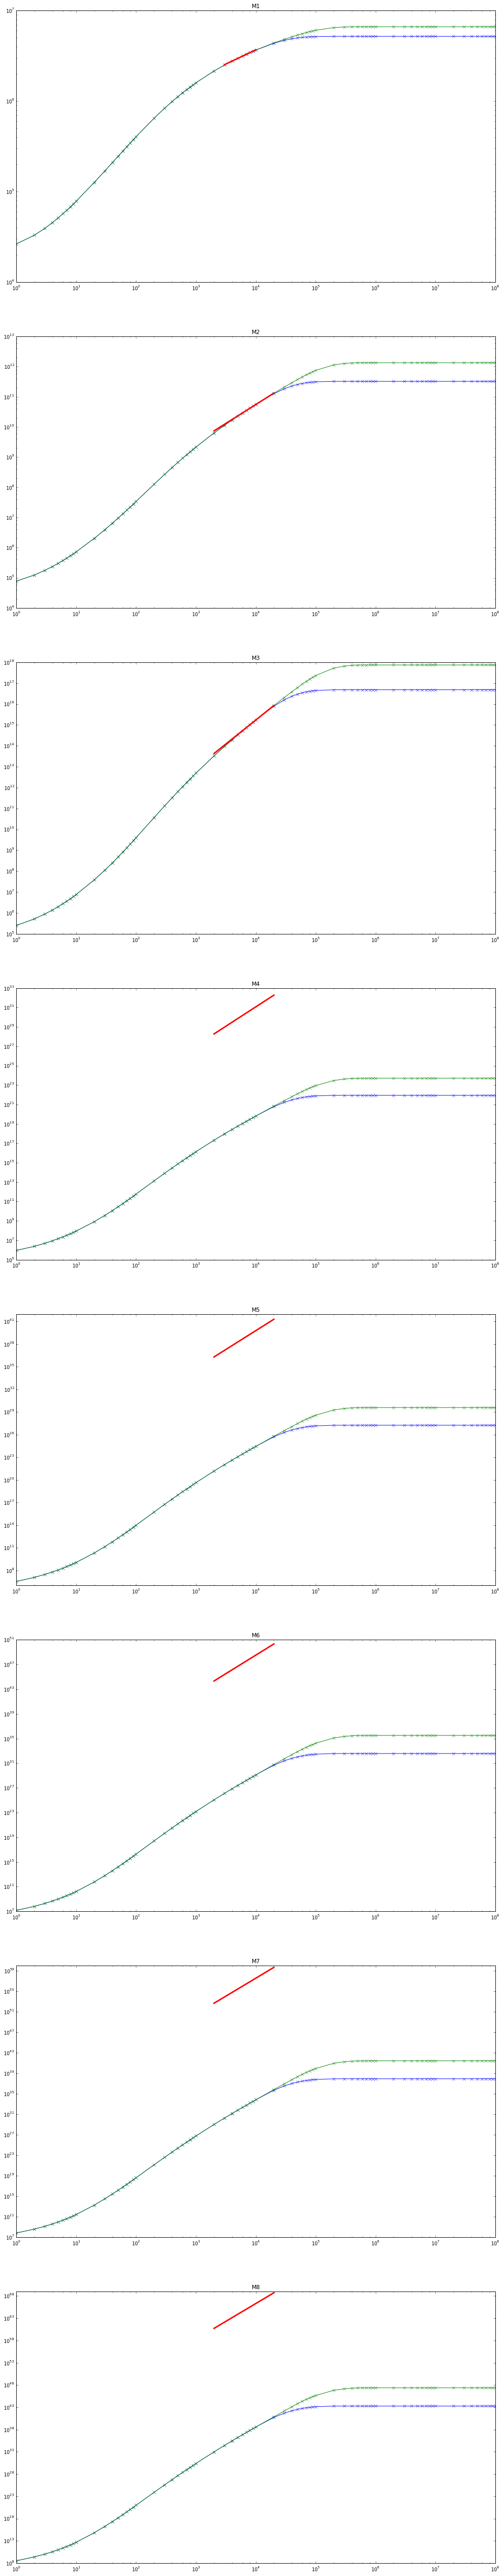

In [472]:
# Plot outcome

fig = plt.figure(figsize = (18,96))

ax1 = fig.add_subplot(811,title='M1')
ax1.loglog(moments_system[5]["t"].values, moments_system[5]["M1"].values, 'x-')
ax1.loglog(moments_system[6]["t"].values, moments_system[6]["M1"].values, 'x-')
ax1.loglog(time_series["M1"], fitfunc(p1["M1"], time_series["M1"]), color = 'red', linewidth = 3)

ax2 = fig.add_subplot(812,title='M2')
ax2.loglog(moments_system[5]["t"].values, moments_system[5]["M2"].values, 'x-')
ax2.loglog(moments_system[6]["t"].values, moments_system[6]["M2"].values, 'x-')
ax2.loglog(time_series["M2"], fitfunc(p1["M2"], time_series["M2"]), color = 'red', linewidth = 3)

ax3 = fig.add_subplot(813,title='M3')
ax3.loglog(moments_system[5]["t"].values, moments_system[5]["M3"].values, 'x-')
ax3.loglog(moments_system[6]["t"].values, moments_system[6]["M3"].values, 'x-')
ax3.loglog(time_series["M3"], fitfunc(p1["M3"], time_series["M3"]), color = 'red', linewidth = 3)

ax4 = fig.add_subplot(814,title='M4')
ax4.loglog(moments_system[5]["t"].values, moments_system[5]["M4"].values, 'x-')
ax4.loglog(moments_system[6]["t"].values, moments_system[6]["M4"].values, 'x-')
ax4.loglog(time_series["M4"], fitfunc(p1["M4"], time_series["M4"]), color = 'red', linewidth = 3)

ax5 = fig.add_subplot(815,title='M5')
ax5.loglog(moments_system[5]["t"].values, moments_system[5]["M5"].values, 'x-')
ax5.loglog(moments_system[6]["t"].values, moments_system[6]["M5"].values, 'x-')
ax5.loglog(time_series["M5"], fitfunc(p1["M5"], time_series["M5"]), color = 'red', linewidth = 3)

ax6 = fig.add_subplot(816,title='M6')
ax6.loglog(moments_system[5]["t"].values, moments_system[5]["M6"].values, 'x-')
ax6.loglog(moments_system[6]["t"].values, moments_system[6]["M6"].values, 'x-')
ax6.loglog(time_series["M6"], fitfunc(p1["M6"], time_series["M6"]), color = 'red', linewidth = 3)

ax7 = fig.add_subplot(817,title='M7')
ax7.loglog(moments_system[5]["t"].values, moments_system[5]["M7"].values, 'x-')
ax7.loglog(moments_system[6]["t"].values, moments_system[6]["M7"].values, 'x-')
ax7.loglog(time_series["M7"], fitfunc(p1["M7"], time_series["M7"]), color = 'red', linewidth = 3)

ax8 = fig.add_subplot(818,title='M8')
ax8.loglog(moments_system[5]["t"].values, moments_system[5]["M8"].values, 'x-')
ax8.loglog(moments_system[6]["t"].values, moments_system[6]["M8"].values, 'x-')
ax8.loglog(time_series["M8"], fitfunc(p1["M8"], time_series["M8"]), color = 'red', linewidth = 3)

plt.show()

## Fitting Correction

In [344]:
# Now fit f(X) = A*X**b*(1+C*X**d)

In [425]:
#fit using leastsq, highly inefficient code, but hopefully legible

fitfunc_corr = lambda q, x, b: q[0]*x**b*(1+q[1]*x**q[2]) # target function
errfunc_corr = lambda q, x, b, y, sdev: (fitfunc_corr(q, x, b) - y)/sdev # distance to target function

#Downscaling
for m in range(1,9):
    p1["M"+str(m)][0] = p1["M"+str(m)][0]/float(max_values[m-1])

q0 = {}

for m in range(1,9):
    q0["M"+str(m)] = [p1["M"+str(m)][0], -0.1, 0.0]
    
# Full output, dictionaries
q1 = {}
cov = {}
infodict = {}
mesg = {}
ier = {}



# Fitting
for m in range(1,9):
    q1["M"+str(m)], cov["M"+str(m)], infodict["M"+str(m)], mesg["M"+str(m)], ier["M"+str(m)] = \
    optimize.leastsq(errfunc_corr, q0["M"+str(m)][:], args=(time_series["M"+str(m)], p1["M"+str(m)][1], moment_series["M"+str(m)], std_dev["M"+str(m)]), maxfev = 4000, full_output=True)

#Rescaling
for m in range(1,9):
    q1["M"+str(m)][0] = float(max_values[m-1])*q1["M"+str(m)][0]
    p1["M"+str(m)][0] = float(max_values[m-1])*p1["M"+str(m)][0]

In [427]:
#For Debug
for m in range(1,9):
    print ""
    print m
    print "A* X**p * (1+B*X**C)"
    print "A \t B \t C"
    print q1["M"+str(m)][0], q1["M"+str(m)][1], q1["M"+str(m)][2]
    print  mesg["M"+str(m)]


1
A* X**p * (1+B*X**C)
A 	 B 	 C
203396.160398 -8.78269414535e-39 8.9877740641
Both actual and predicted relative reductions in the sum of squares
  are at most 0.000000

2
A* X**p * (1+B*X**C)
A 	 B 	 C
551827.761179 -1.02748120719e-44 9.78341858281
Number of calls to function has reached maxfev = 4000.

3
A* X**p * (1+B*X**C)
A 	 B 	 C
11586142.3478 -11.7281639136 -0.372943905577
Both actual and predicted relative reductions in the sum of squares
  are at most 0.000000

4
A* X**p * (1+B*X**C)
A 	 B 	 C
2322598.24184 -2.18318763465e+12 -3.74181672629
Both actual and predicted relative reductions in the sum of squares
  are at most 0.000000

5
A* X**p * (1+B*X**C)
A 	 B 	 C
2.57774771306e+20 -1.00160015153 -0.000180175649862
Both actual and predicted relative reductions in the sum of squares
  are at most 0.000000

6
A* X**p * (1+B*X**C)
A 	 B 	 C
7.86271412002e+25 -1.00123879466 -0.000138171765812
Both actual and predicted relative reductions in the sum of squares
  are at most 0.000

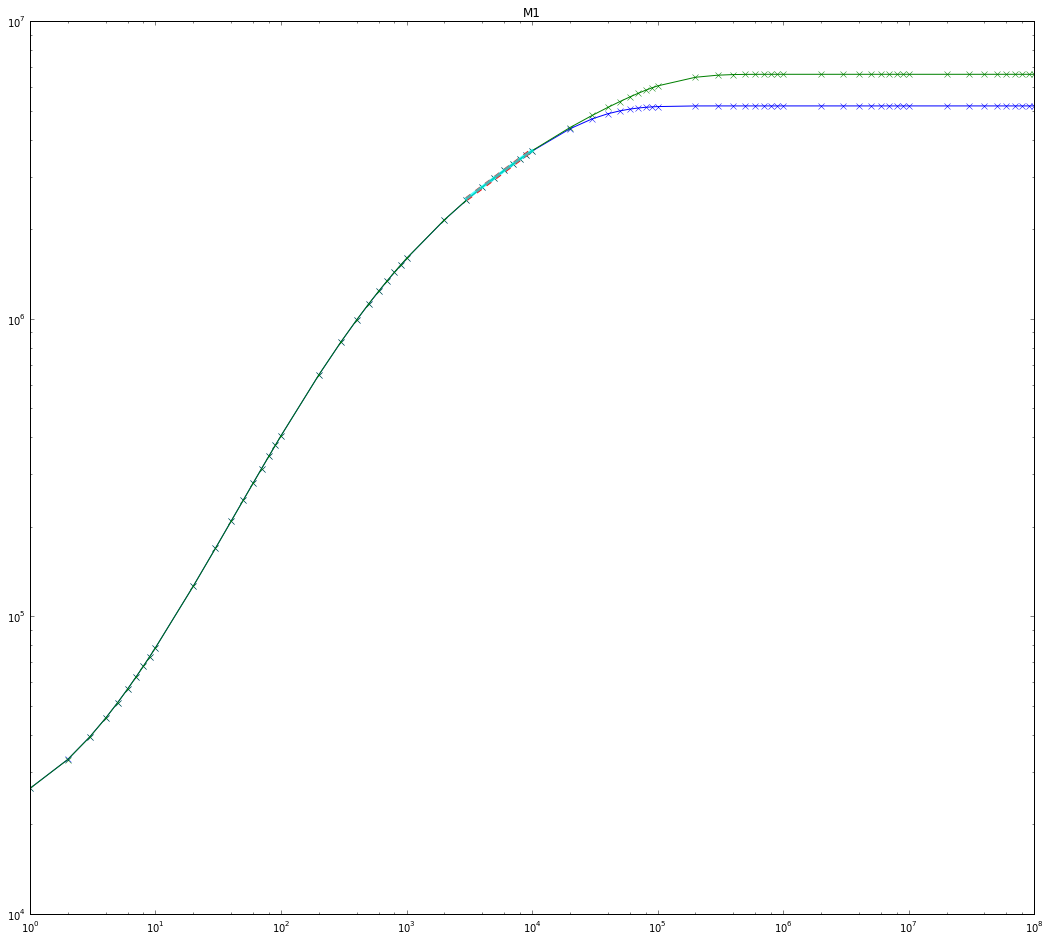

In [428]:
# Plot outcome

fig = plt.figure(figsize = (18,16))

ax1 = fig.add_subplot(111,title='M1')
ax1.loglog(moments_system[5]["t"].values, moments_system[5]["M1"].values, 'x-')
ax1.loglog(moments_system[6]["t"].values, moments_system[6]["M1"].values, 'x-')
ax1.loglog(time_series["M1"], fitfunc(p1["M1"], time_series["M1"]), color = 'red', ls = 'dashed', linewidth = 4)
ax1.loglog(time_series["M1"], fitfunc_corr(q1["M1"], time_series["M1"], p1["M1"][1]), color = 'cyan', alpha = 0.7, linewidth = 3)


plt.show()

# Fitting Moments vs System Size

In [439]:
# Write out last moment
last_lines = []

i = 0
for L in system_sizes:
    last_lines.append(moments_system[i].tail(1).values)
    i = i + 1

#for line in last_lines:
for line in last_lines:
    print line[0][0], line[0][3]
#moments_grouped[m1_grouped.index.get_level_values('L') == 31].tail(1).to_csv(path_or_buf = 'tststring.dat', sep = '\t', index_label = "#L    TMax", columns = ["M1", "M2", "M3", "M4", "M5", "M6", "M7", "M8"], header = ["M1", "M2", "M3", "M4", "M5", "M6", "M7", "M8"])
#print last_moment

15.0 291610.566
31.0 722310.759
63.0 1468238.211
127.0 2516890.493
255.0 3781765.447
511.0 5191989.0
1023.0 6631291.069


In [434]:
moments_system

[     L          t  chunk          M1            M2            M3  \
 0   15          1  500.5   26421.697  7.747115e+04  2.513777e+05   
 1   15          2  500.5   33050.504  1.240569e+05  5.205282e+05   
 2   15          3  500.5   39385.163  1.775381e+05  8.956728e+05   
 3   15          4  500.5   45468.551  2.376124e+05  1.390163e+06   
 4   15          5  500.5   51342.389  3.040993e+05  2.018064e+06   
 5   15          6  500.5   57038.946  3.768371e+05  2.793200e+06   
 6   15          7  500.5   62580.385  4.556770e+05  3.729418e+06   
 7   15          8  500.5   67988.644  5.405567e+05  4.841861e+06   
 8   15          9  500.5   73267.848  6.312005e+05  6.142467e+06   
 9   15         10  500.5   78435.631  7.275753e+05  7.645515e+06   
 10  15         20  500.5  124691.417  1.962311e+06  3.615972e+07   
 11  15         30  500.5  161874.312  3.529006e+06  9.295860e+07   
 12  15         40  500.5  191012.763  5.213417e+06  1.765902e+08   
 13  15         50  500.5  213540.